In [54]:
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(font_scale=1.5)

In [23]:
models = {'svm': LinearSVC(), 
          'log_reg': LogisticRegression(), 
          'naive_baives': MultinomialNB(), 
          'knn': KNeighborsClassifier(),
          'dec_tree': DecisionTreeClassifier()}

Read in the Kobe Bryant shooting data [https://www.kaggle.com/c/kobe-bryant-shot-selection]

In [87]:
kobe = pd.read_csv('../data/kobe.csv')
kobe.dropna(inplace=True)

For now, use just the numerical datatypes. They are below as `num_columns`

In [39]:
kobe

,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,...,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,team_name,game_date,matchup,opponent,shot_id
0,Jump Shot,Jump Shot,10,20000012,33.9723,167,72,-118.1028,10,1,...,2PT Field Goal,Right Side(R),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,1
1,Jump Shot,Jump Shot,12,20000012,34.0443,-157,0,-118.4268,10,1,...,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,2
2,Jump Shot,Jump Shot,35,20000012,33.9093,-101,135,-118.3708,7,1,...,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,3
3,Jump Shot,Jump Shot,43,20000012,33.8693,138,175,-118.1318,6,1,...,2PT Field Goal,Right Side Center(RC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,4
4,Driving Dunk Shot,Dunk,155,20000012,34.0443,0,0,-118.2698,6,2,...,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,5
5,Jump Shot,Jump Shot,244,20000012,34.0553,-145,-11,-118.4148,9,3,...,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,6
6,Layup Shot,Layup,251,20000012,34.0443,0,0,-118.2698,8,3,...,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,7
7,Jump Shot,Jump Shot,254,20000012,34.0163,1,28,-118.2688,8,3,...,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,8
8,Jump Shot,Jump Shot,265,20000012,33.9363,-65,108,-118.3348,6,3,...,2PT Field Goal,Left Side(L),In The Paint (Non-RA),8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,9
9,Running Jump Shot,Jump Shot,294,20000012,33.9193,-33,125,-118.3028,3,3,...,2PT Field Goal,Center(C),In The Paint (Non-RA),8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,10


In [52]:
[(col, dtype) for col, dtype in zip(kobe.columns, kobe.dtypes) if dtype != 'object']
num_columns = [col for col, dtype in zip(kobe.columns, kobe.dtypes) if dtype != 'object']
num_columns

['game_event_id',
 'game_id',
 'lat',
 'loc_x',
 'loc_y',
 'lon',
 'minutes_remaining',
 'period',
 'playoffs',
 'seconds_remaining',
 'shot_distance',
 'shot_made_flag',
 'team_id',
 'shot_id',
 'pred']

## The `shot_made_flag` is the result (0 or 1) of the shot that Kobe took. Some of the values are missing (e.g. `NaN`). *_Drop_* them.

In [ ]:
#kobe.hist()

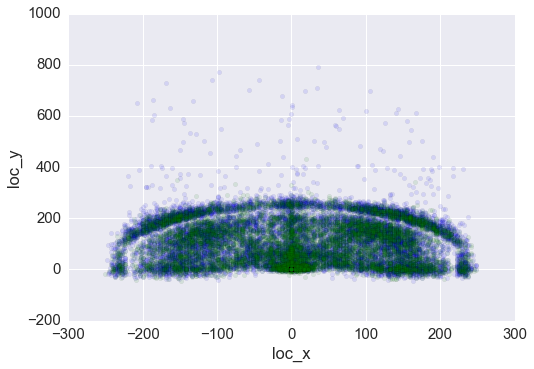

In [77]:
fig, ax = plt.subplots()
kobe[kobe.shot_made_flag==0].plot(kind='scatter', x='loc_x', y='loc_y', color='blue', alpha=0.1, ax=ax)
kobe[kobe.shot_made_flag==1].plot(kind='scatter', x='loc_x', y='loc_y', color='green', alpha=0.1, ax=ax)
# plt.scatter(kobe.loc_x, kobe.loc_y, alpha=0.2)

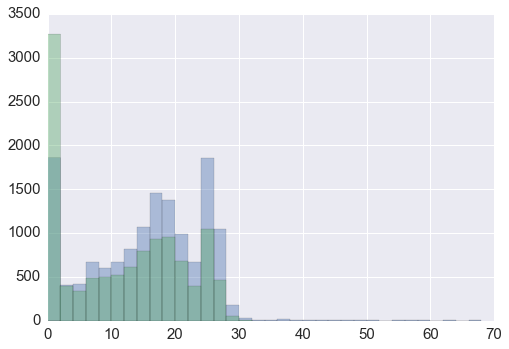

In [68]:
kobe[kobe.shot_made_flag==0].shot_distance.hist(bins=range(0,70,2), alpha=.4)
kobe[kobe.shot_made_flag==1].shot_distance.hist(bins=range(0,70,2), alpha=.4)

## Use the `num_columns`, the `kobe` dataframe to `fit()` the `models`. Choose one or more of the entries in `num_columns` as features. These models are used to predict whether Kobe will make or miss a shot given the certain input parameters provided.

## Get the accuracy of each model with respect to the data used to fit the model.

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(font_scale=1.5)

0.59719033350196526

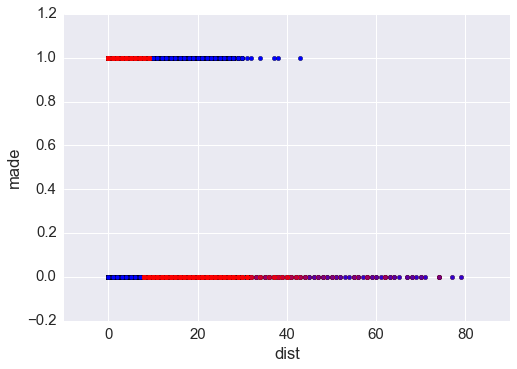

In [94]:
# fit a linear regression model and store the predictions
feature_cols = ['shot_distance', 'minutes_remaining']
X = kobe[feature_cols] #kobe[['shot_distance', 'minutes_remaining']]
y = kobe.shot_made_flag
# from sklearn.linear_model import LinearRegression as Model
from sklearn.linear_model import LogisticRegression as Model
# from sklearn.tree import DecisionTreeClassifier as Model
# from sklearn.ensemble import RandomForestClassifier as Model
model = Model()
model.fit(X, y)
kobe['pred'] = model.predict(X)
# scatter plot that includes the regression line
plt.scatter(kobe.shot_distance, kobe.shot_made_flag)
plt.scatter(kobe.shot_distance, kobe.pred, color='red', alpha=.2)
plt.xlabel('dist')
plt.ylabel('made')

from sklearn.metrics import accuracy_score
accuracy_score(kobe.shot_made_flag, kobe.pred.round())


## The following is a reminder of how the SciKit-Learn Models can be interfaced

0.5

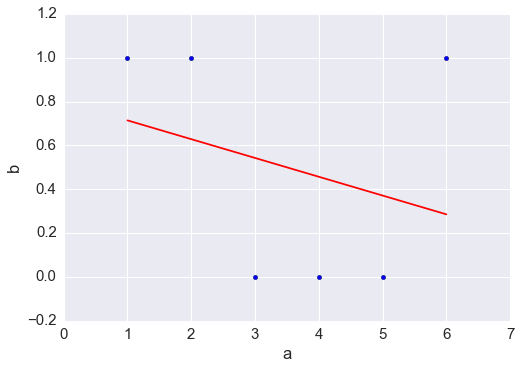

In [45]:
# fit a linear regression model and store the predictions
example = pd.DataFrame({'a':[1,2,3,4,5,6], 'b':[1,1,0,0,0,1]})
feature_cols = ['a']
X = example[feature_cols]
y = example.b
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X, y)
example['pred'] = model.predict(X)
# scatter plot that includes the regression line
plt.scatter(example.a, example.b)
plt.plot(example.a, example.pred, color='red')
plt.xlabel('a')
plt.ylabel('b')

from sklearn.metrics import accuracy_score
accuracy_score(example.b, example.pred.astype(int))


In [ ]:
kobe = pd.read_csv('../data/kobe.csv')
kobe.dropna(inplace=True)
[(col, dtype) for col, dtype in zip(kobe.columns, kobe.dtypes) if dtype != 'object']
num_columns = [col for col, dtype in zip(kobe.columns, kobe.dtypes) if dtype != 'object']

# fit a linear regression model and store the predictions
feature_cols = ['shot_distance', 'minutes_remaining']
X = kobe[feature_cols] #kobe[['shot_distance', 'minutes_remaining']]
y = kobe.shot_made_flag

# from sklearn.linear_model import LinearRegression as Model
from sklearn.linear_model import LogisticRegression as Model
# from sklearn.tree import DecisionTreeClassifier as Model
# from sklearn.ensemble import RandomForestClassifier as Model
model = Model()
model.fit(X, y)
pred = model.predict(X)
# scatter plot that includes the regression line
plt.scatter(kobe.shot_distance, kobe.shot_made_flag)
plt.scatter(kobe.shot_distance, pred, color='red', alpha=.2)
plt.xlabel('dist')
plt.ylabel('made')

print(accuracy_score(kobe.shot_made_flag, pred.round()))
print(confusion_matrix(kobe.shot_made_flag, pred.round()))
print(classification_report(kobe.shot_made_flag, pred.round()))


In [ ]:
from sklearn.linear_model import LogisticRegression as Model
# from sklearn.tree import DecisionTreeClassifier as Model
# from sklearn.ensemble import RandomForestClassifier as Model
model = Model()

from sklearn.metrics import (accuracy_score, 
                             classification_report, 
                             confusion_matrix, auc, roc_curve
                            )
from sklearn.metrics import *
from sklearn import cross_validation

X_train, X_test, y_train, y_test = cross_validation.train_test_split(
    X, y, test_size=0.4, random_state=0)

cross_validation.cross_val_score(model, X, y, cv=10)
